In [4]:
import pricey as pr
import yfinance as yf
from sklearn.decomposition import PCA, KernelPCA, FastICA
%matplotlib inline

In [2]:
assets = {
    'ACWI':      'ACWI',        # 주식시장
    'SPY':       'SPX',         # 미국주식
    'QQQ':       'NASDAQ',      # 미국나스닥
    '102110.KS': 'KSP2',        # 한국주식
    'EWJ':       'JP',          # 일본주식
    'MCHI':      'CN',          # 중국주식
    'IEV':       'EU',          # 유럽주식
    'INDA':      'INDIA',       # 인도주식
    'EFA':       'DEVELOPED',   # 선진국주식
    'EEM':       'EM',          # 이머징주식
    'AAXJ':      'AAXJ',        # 아시아(일본제외)
    'BKF':       'BRIC',        # 브릭스
    'FM':        'FRONTIER',    # 프론티어
    'ILF':       'LATAM',       # 남미
    'GULF':      'MIDEAST',     # 중동아시아
    'GWX':       'SMALLCAP',    # 글로벌중소형주(미국제외)
    
    'AGG':       'USAGG',       # 미국종합채
    'SHY':       'UST-SHORT',   # 미국단기채
    'IEF':       'UST-MID',     # 미국중기채
    'TLT':       'UST-LONG',    # 미국장기채
    'TIP':       'USTIP',       # 미국물가채
    'LQD':       'USIG',        # 미국투자등급채
    'HYG':       'USHY',        # 미국하이일드
    'MBB':       'USMBS',       # 미국MBS
    'BKLN':      'USBKLN',      # 미국뱅크론
    'CWB':       'USCB',        # 미국CB
    'PFF':       'USPFF',       # 미국우선주
    'EMB':       'EMB',         # 이머징채권
    '148070.KS': 'KTB-MID',     # 한국중기채
    
    'DBC':       'COMDTY',      # 원자재
    'USO':       'WTI',         # WTI
    'GLD':       'GOLD',        # 금
    'SLV':       'SILVER',      # 은
    'DBA':       'AGRI',        # 농산물
    'UNG':       'GAS',         # 천연가스
    'DBE':       'ENERGY',      # 에너지
    'DBB':       'BASEMETAL',   # 철강
    'GLTR':      'PRECMETAL',   # 귀금속
    
    'UUP':       'USD',         # 달러
    'FXY':       'JPY',         # 엔화
    'FXE':       'EUR',         # 유로화
    'FXA':       'AUD',         # 호주달러 
    'KRW=X':     'USDKRW',      # 원달러
    
    'VNQ':       'US-REIT',     # 미국리츠
    'REM':       'US-MREIT',    # 미국모기지리츠
    
    '^VIX':       'VIX',         # 변동성
}

In [3]:
symbols = ' '.join(assets.keys())
start = '2010-12-20'
end = '2020-05-08'
db = yf.download(symbols, start=start, end=end, threads=True)['Close']
db = db.rename(columns=assets).fillna(method='ffill')

C:\Users\USER\AppData\Local\Temp\ipykernel_708\2503020729.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  db = yf.download(symbols, start=start, end=end, threads=True)['Close']
[*********************100%***********************]  46 of 46 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_708\2503020729.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  db = db.rename(columns=assets).fillna(method='ffill')


In [6]:
db

,KSP2,KTB-MID,AAXJ,ACWI,USAGG,BRIC,USBKLN,USCB,AGRI,BASEMETAL,...,UST-SHORT,SILVER,SPX,USTIP,UST-LONG,GAS,WTI,USD,US-REIT,VIX
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-20,23377.929688,NaN,51.999504,37.482998,82.254616,39.002937,NaN,25.922012,30.518936,22.418610,...,77.185486,28.709999,103.410294,89.397163,72.065964,185.600006,304.399994,22.520231,36.988369,16.410000
2010-12-21,23592.773438,NaN,52.702869,37.808010,82.410629,39.636448,NaN,25.959801,30.713758,22.902185,...,77.167145,28.639999,104.065933,89.547119,72.568924,179.199997,306.320007,22.568682,37.377499,16.490000
2010-12-22,23645.386719,NaN,52.778416,37.881508,82.317001,39.718189,NaN,26.003887,31.044956,23.027916,...,77.148750,28.570000,104.389618,89.480431,72.050499,180.479996,309.119995,22.549303,37.664234,15.450000
2010-12-23,23632.234375,NaN,52.568581,37.865170,82.161003,39.644619,NaN,25.947212,31.220297,22.660398,...,77.047668,28.610001,104.240211,89.147224,71.903488,179.520004,311.839996,22.481472,37.493568,16.469999
2010-12-24,23570.843750,NaN,52.568581,37.865170,82.161003,39.644619,NaN,25.947212,31.220297,22.660398,...,77.047668,28.610001,104.240211,89.147224,71.903488,179.520004,311.839996,22.481472,37.493568,16.469999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,25820.000000,125395.0,61.799999,66.910004,116.870003,36.480000,20.760000,51.810001,13.730000,12.340000,...,86.599998,13.920000,282.790009,121.010002,167.949997,13.010000,18.860001,26.820000,73.540001,37.189999
2020-05-04,25035.000000,125545.0,62.509998,67.129997,116.970001,36.860001,20.639999,52.480000,13.680000,12.320000,...,86.599998,13.770000,283.570007,121.129997,167.160004,13.780000,19.670000,26.969999,73.180000,35.970001
2020-05-05,25035.000000,125545.0,62.750000,67.599998,116.879997,37.119999,20.760000,53.419998,13.660000,12.410000,...,86.589996,13.930000,286.190002,121.269997,166.089996,14.490000,21.510000,26.990000,73.540001,33.610001


In [5]:
# db_ = db.loc[:'2020-04-30'].iloc[-250*5:]
db_ = db.loc[:].iloc[-250*5:]
reducer = FastICA(n_components=3, random_state=0)
# pricer = Pricer(db_, reducer=KernelPCA(n_components=3, kernel='linear', fit_inverse_transform=True))
pricer = pr.Pricer(db_, reducer=reducer, prob=0.8, howfar=250)

11:57:16 - cmdstanpy - INFO - Chain [1] start processing
11:57:16 - cmdstanpy - INFO - Chain [1] done processing
11:57:16 - cmdstanpy - INFO - Chain [1] start processing
11:57:17 - cmdstanpy - INFO - Chain [1] done processing
11:57:17 - cmdstanpy - INFO - Chain [1] start processing
11:57:17 - cmdstanpy - INFO - Chain [1] done processing


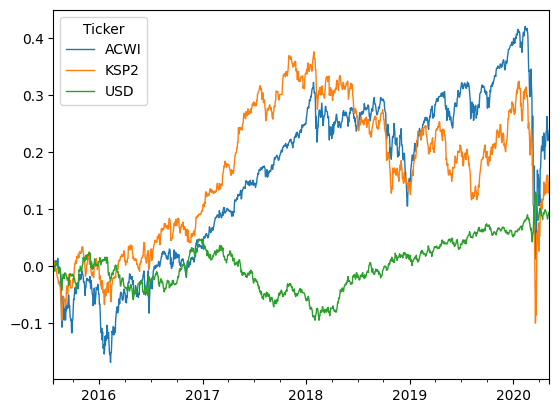

In [6]:
pricer.plot_p(symbols=['ACWI','KSP2','USD'], lw=1)

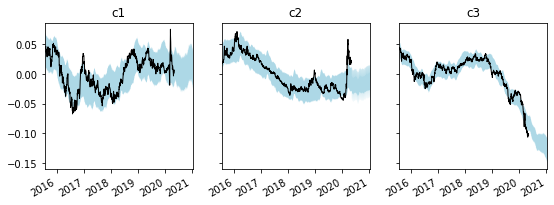

In [22]:
pricer.plot_comp_forecast()

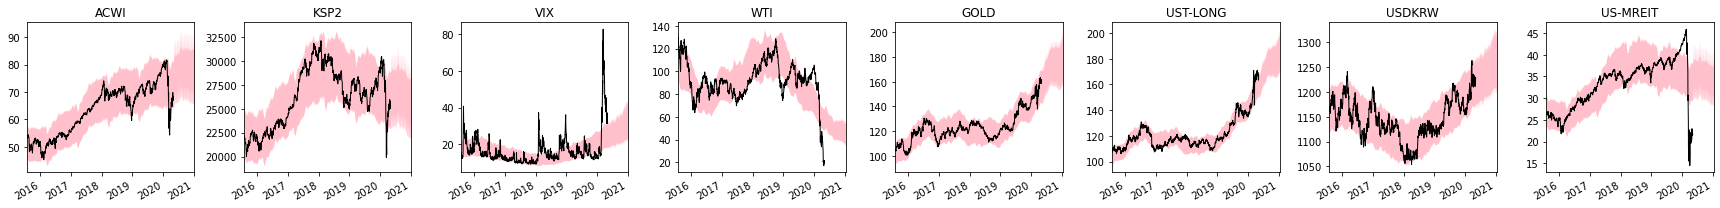

In [23]:
pricer.plot_p_forecast('ACWI','KSP2','VIX','WTI','GOLD','UST-LONG','USDKRW','US-MREIT')

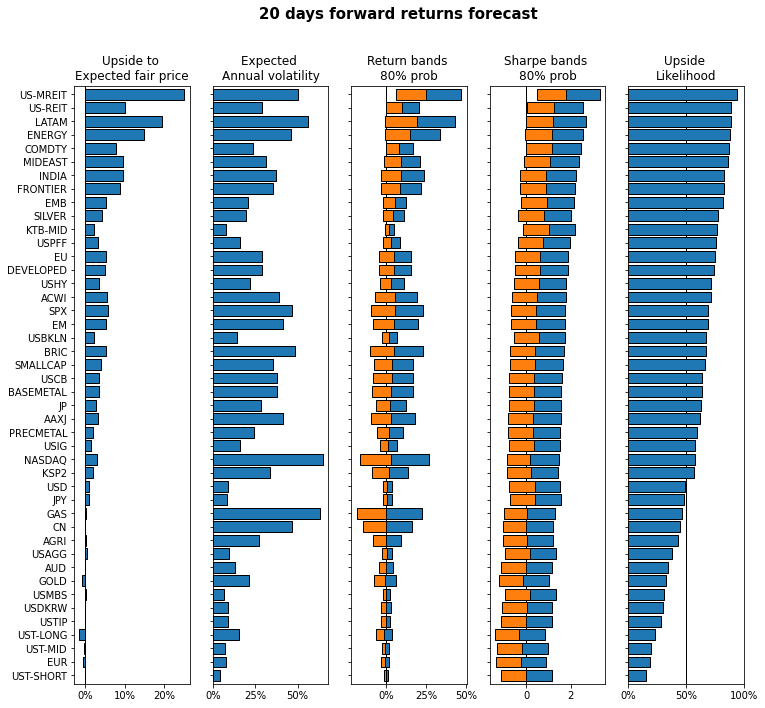

In [24]:
pricer.plot_stats(nfwd=20, up_thres=0.01, sortby='up_prob', excludes=['VIX','WTI'])

In [25]:
pricer.stats(nfwd=20, up_thres=0.01)

,rband_fair,rband_min,rband_max,std,shband_min,shband_fair,shband_max,up_prob
KSP2,0.020852,-0.084617,0.138473,0.338784,-0.883058,0.217613,1.445101,0.572648
KTB-MID,0.022215,-0.003135,0.048211,0.078016,-0.142087,1.006754,2.184810,0.767865
AAXJ,0.033533,-0.095197,0.180579,0.413255,-0.814444,0.286888,1.544913,0.621380
ACWI,0.054385,-0.069408,0.194646,0.387998,-0.632461,0.495570,1.773657,0.712556
USAGG,0.004772,-0.024962,0.035413,0.093324,-0.945672,0.180800,1.341624,0.377632
BRIC,0.052681,-0.099102,0.230035,0.483718,-0.724343,0.385046,1.681344,0.673870
USBKLN,0.022461,-0.023187,0.070242,0.141890,-0.577772,0.559661,1.750249,0.674855
USCB,0.035398,-0.082801,0.168830,0.376583,-0.777378,0.332335,1.585056,0.640212
AGRI,0.002256,-0.081382,0.093509,0.270711,-1.062863,0.029466,1.221249,0.433345
BASEMETAL,0.034827,-0.083364,0.168257,0.376774,-0.782264,0.326802,1.578871,0.637505


In [9]:
pricer._sample_stats('2020-05-08', 20)

(Ticker
 KSP2         0.014218
 KTB-MID      0.001557
 AAXJ         0.016535
 ACWI         0.016574
 USAGG        0.002282
 BRIC         0.002986
 USBKLN      -0.009648
 USCB         0.040772
 AGRI        -0.007551
 BASEMETAL    0.012107
 COMDTY      -0.026070
 ENERGY      -0.056104
 EM           0.009486
 DEVELOPED    0.003996
 EMB          0.004299
 JP           0.012474
 FRONTIER     0.034093
 AUD          0.008271
 EUR         -0.006363
 JPY          0.009551
 GOLD         0.013249
 PRECMETAL    0.004253
 MIDEAST     -0.002517
 SMALLCAP     0.023787
 USHY        -0.015153
 UST-MID      0.007722
 EU          -0.000039
 LATAM       -0.045021
 INDIA        0.012128
 USDKRW       0.008416
 USIG        -0.012118
 USMBS        0.007127
 CN           0.009981
 USPFF        0.006647
 NASDAQ       0.053030
 US-MREIT    -0.012733
 UST-SHORT    0.002324
 SILVER      -0.004497
 SPX          0.020529
 USTIP        0.003721
 UST-LONG     0.007846
 GAS         -0.037005
 WTI         -0.385690
 US